In [1]:
# leer archivo data/IPH_robos_ene-ago-2025_tecmty.xlsx
import pandas as pd
df = pd.read_excel('data/IPH_robos_ene-ago-2025_tecmty.xlsx')
df.head()

,FOLIO,FECHA,HORA,MINUTO,TIPO,VOLENCIA,LATITUD,LONGITUD,DISTRITO,CUADRANTE
0,759476,2025-01-01,5,11,ROBO A NEGOCIO,SI,28.600113,-106.061258,Zapata,76
1,759978,2025-01-01,5,25,ROBO A NEGOCIO,SI,28.609652,-106.065990,Zapata,75
2,760050,2025-01-01,6,31,ROBO DE VEHICULO,NO,28.639322,-106.039862,Morelos,51
3,760404,2025-01-01,11,50,ROBO A CASA HABITACION,NO,28.643275,-106.030795,Morelos,51
4,769412,2025-01-01,12,0,ROBO A NEGOCIO,NO,28.693501,-106.115590,Villa,17


In [2]:
# crear columna de 'Mes' de acuerdo a la columna 'Fecha'
df['MES'] = df['FECHA'].dt.month
df.head()

,FOLIO,FECHA,HORA,MINUTO,TIPO,VOLENCIA,LATITUD,LONGITUD,DISTRITO,CUADRANTE,MES
0,759476,2025-01-01,5,11,ROBO A NEGOCIO,SI,28.600113,-106.061258,Zapata,76,1
1,759978,2025-01-01,5,25,ROBO A NEGOCIO,SI,28.609652,-106.065990,Zapata,75,1
2,760050,2025-01-01,6,31,ROBO DE VEHICULO,NO,28.639322,-106.039862,Morelos,51,1
3,760404,2025-01-01,11,50,ROBO A CASA HABITACION,NO,28.643275,-106.030795,Morelos,51,1
4,769412,2025-01-01,12,0,ROBO A NEGOCIO,NO,28.693501,-106.115590,Villa,17,1


In [9]:
# crear una tabla con la columna de MES, que agrupe los tipos de robos, con o sin violencia, y que cuente el número de robos en cada categoría, para poder identificar la clase de robo más común en cada mes
mayor_clase = df.groupby(['MES', 'TIPO', 'VOLENCIA']).size().reset_index(name='NUM_ROBOS')
# mostrar las primeras 10 filas de la tabla resultante
mayor_clase.head(12)

,MES,TIPO,VOLENCIA,NUM_ROBOS
0,1,ROBO A CASA HABITACION,NO,26
1,1,ROBO A CASA HABITACION,SI,4
2,1,ROBO A NEGOCIO,NO,57
3,1,ROBO A NEGOCIO,SI,20
4,1,ROBO DE VEHICULO,NO,16
5,1,ROBO DE VEHICULO,SI,1
6,2,ROBO A CASA HABITACION,NO,32
7,2,ROBO A CASA HABITACION,SI,1
8,2,ROBO A NEGOCIO,NO,63
9,2,ROBO A NEGOCIO,SI,18


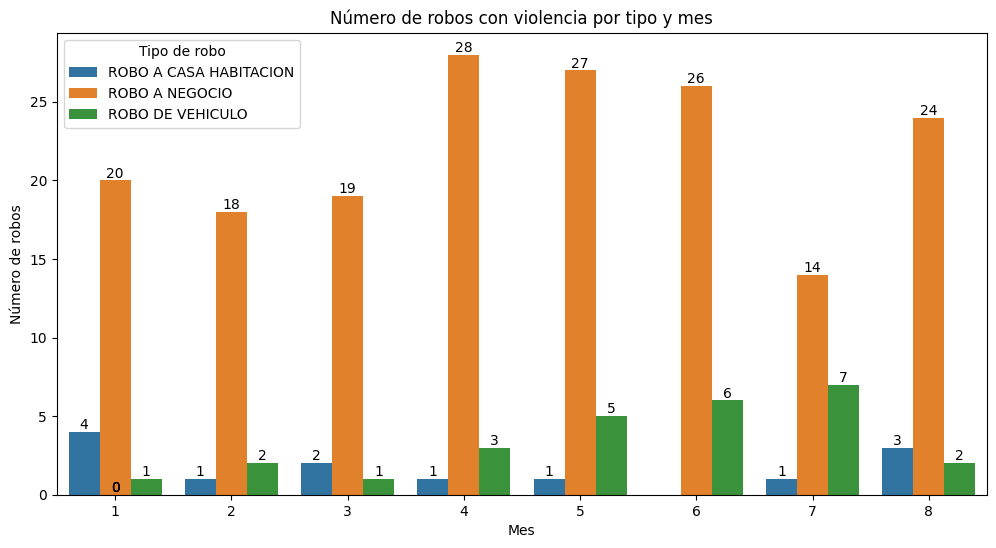

In [22]:
# graficar la tabla mayor_clase usando seaborn, con un gráfico de barras apiladas, donde el eje x sea el mes, el eje y sea el número de robos, y el color sea el tipo de robo, que sea solo para robos con violencia
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.barplot(data=mayor_clase[mayor_clase['VOLENCIA'] == 'SI'], x='MES', y='NUM_ROBOS', hue='TIPO')
plt.title('Número de robos con violencia por tipo y mes')
plt.xlabel('Mes')
plt.ylabel('Número de robos')
plt.legend(title='Tipo de robo')
# agregar etiquetas de número de robos encima de cada barra
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

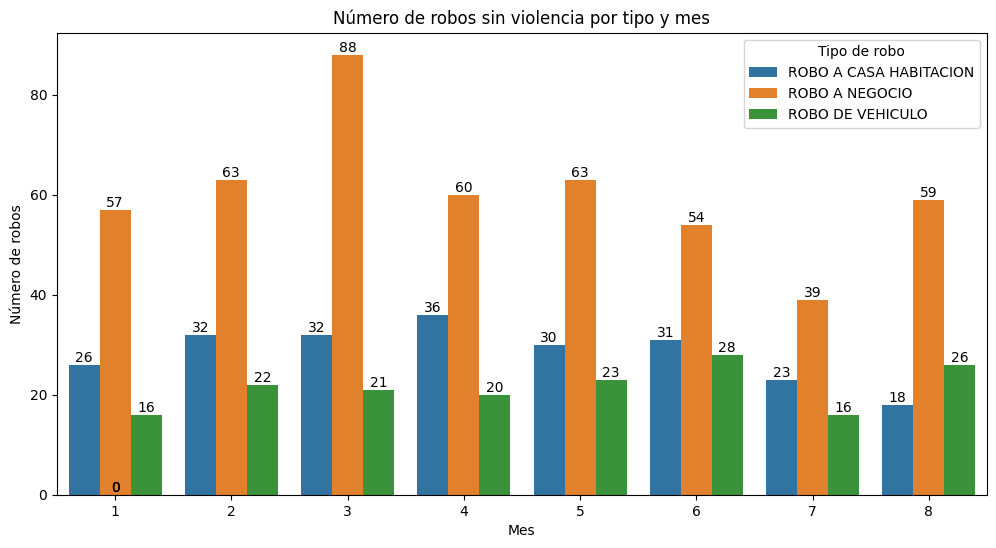

In [20]:
# ahora graficar la tabla mayor_clase usando seaborn, con un gráfico de barras apiladas, donde el eje x sea el mes, el eje y sea el número de robos, y el color sea el tipo de robo, que sea solo para robos sin violencia
# a cada barra agregar una etiqueta con el número de robos
plt.figure(figsize=(12,6))
sns.barplot(data=mayor_clase[mayor_clase['VOLENCIA'] == 'NO'], x='MES', y='NUM_ROBOS', hue='TIPO')
plt.title('Número de robos sin violencia por tipo y mes')
plt.xlabel('Mes')
plt.ylabel('Número de robos')
plt.legend(title='Tipo de robo')
# agregar etiquetas a cada barra
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

In [6]:
# como puedo hacer merge de esta tabla con la tabla original df para agregar la columna de NUM_ROBOS a la tabla original
df_merged = pd.merge(df, mayor_clase, on=['MES', 'TIPO', 'VOLENCIA'], how='left')
df_merged.head(20)

,FOLIO,FECHA,HORA,MINUTO,TIPO,VOLENCIA,LATITUD,LONGITUD,DISTRITO,CUADRANTE,MES,NUM_ROBOS
0,759476,2025-01-01,5,11,ROBO A NEGOCIO,SI,28.600113,-106.061258,Zapata,76,1,20
1,759978,2025-01-01,5,25,ROBO A NEGOCIO,SI,28.609652,-106.065990,Zapata,75,1,20
2,760050,2025-01-01,6,31,ROBO DE VEHICULO,NO,28.639322,-106.039862,Morelos,51,1,16
3,760404,2025-01-01,11,50,ROBO A CASA HABITACION,NO,28.643275,-106.030795,Morelos,51,1,26
4,769412,2025-01-01,12,0,ROBO A NEGOCIO,NO,28.693501,-106.115590,Villa,17,1,57
5,760412,2025-01-01,12,6,ROBO A NEGOCIO,NO,28.693475,-106.115476,Villa,17,1,57
6,760559,2025-01-01,13,47,ROBO DE VEHICULO,NO,28.771511,-106.161973,Colón,3,1,16
7,761131,2025-01-01,19,10,ROBO A CASA HABITACION,NO,28.662759,-105.948717,Morelos,48,1,26
8,762249,2025-01-02,9,10,ROBO DE VEHICULO,NO,28.587403,-106.040247,Morelos,59,1,16
9,762311,2025-01-02,9,42,ROBO A NEGOCIO,NO,28.631906,-106.121163,Diana,32,1,57


In [25]:
# crear tres columnas, de acuerdo a la columna de HORA, llamadas MAÑANA, TARDE y NOCHE, donde MAÑANA sea de 6 a 12, TARDE de 12 a 18 y NOCHE de 18 a 6, y calcular el número de robos en cada franja horaria, agrupados por tipo de robo y violencia
def franja_horaria(hora):
    if 6 <= hora < 12:
        return 'MAÑANA'
    elif 12 <= hora < 18:
        return 'TARDE'
    else:
        return 'NOCHE'

df_merged['FRANJA_HORARIA'] = df_merged['HORA'].apply(franja_horaria)

# Calcular el número de robos en cada franja horaria, agrupados por tipo de robo y violencia
df_robos_franja = df_merged.groupby(['FRANJA_HORARIA', 'TIPO', 'VOLENCIA']).size().reset_index(name='NUM_ROBOS')
df_robos_franja.head(18)

,FRANJA_HORARIA,TIPO,VOLENCIA,NUM_ROBOS
0,MAÑANA,ROBO A CASA HABITACION,NO,60
1,MAÑANA,ROBO A CASA HABITACION,SI,4
2,MAÑANA,ROBO A NEGOCIO,NO,190
3,MAÑANA,ROBO A NEGOCIO,SI,36
4,MAÑANA,ROBO DE VEHICULO,NO,58
5,MAÑANA,ROBO DE VEHICULO,SI,5
6,NOCHE,ROBO A CASA HABITACION,NO,83
7,NOCHE,ROBO A CASA HABITACION,SI,6
8,NOCHE,ROBO A NEGOCIO,NO,160
9,NOCHE,ROBO A NEGOCIO,SI,101


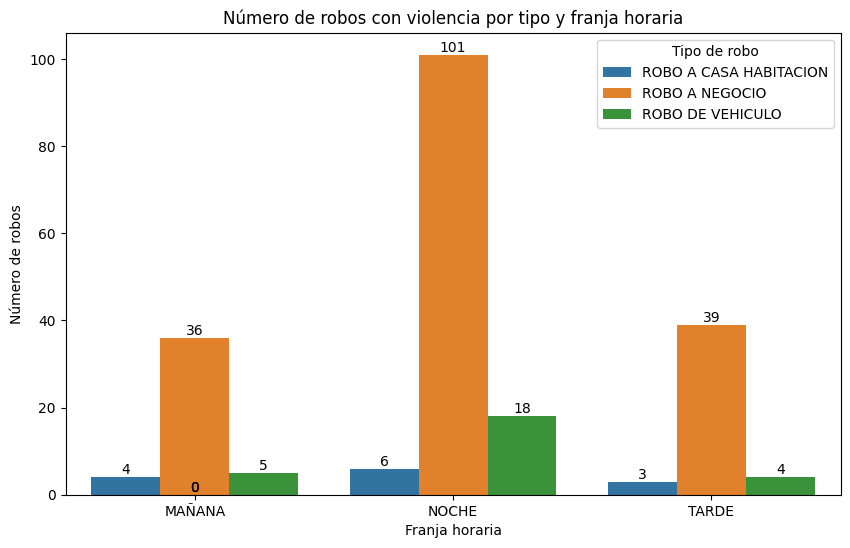

In [26]:
# graficar lo anterior usando seaborn, con un gráfico de barras apiladas, donde el eje x sea la franja horaria, el eje y sea el número de robos, y el color sea el tipo de robo, que sea solo para robos con violencia
plt.figure(figsize=(10,6))
sns.barplot(data=df_robos_franja[df_robos_franja['VOLENCIA'] == 'SI'], x='FRANJA_HORARIA', y='NUM_ROBOS', hue='TIPO')
plt.title('Número de robos con violencia por tipo y franja horaria')
plt.xlabel('Franja horaria')
plt.ylabel('Número de robos')
plt.legend(title='Tipo de robo')
# agregar etiquetas de número de robos encima de cada barra
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

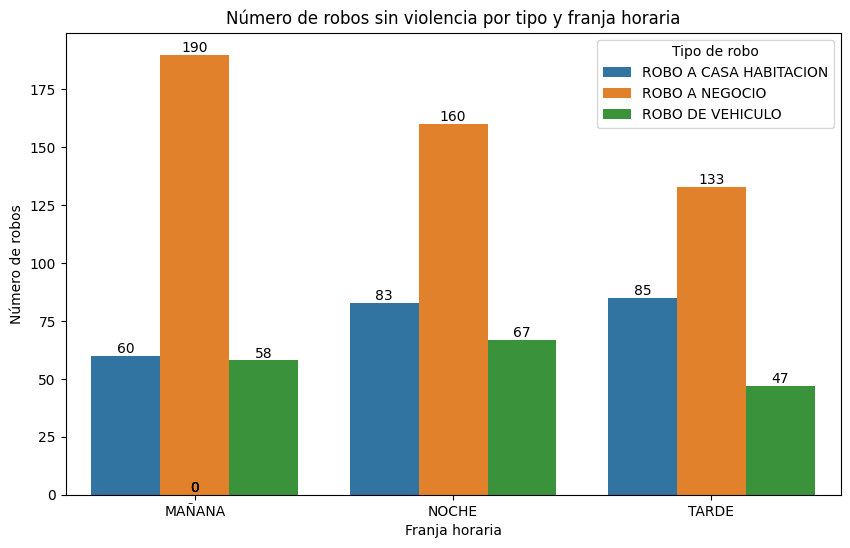

In [27]:
# graficar lo anterior usando seaborn, con un gráfico de barras apiladas, donde el eje x sea la franja horaria, el eje y sea el número de robos, y el color sea el tipo de robo, que sea solo para robos sin violencia
plt.figure(figsize=(10,6))
sns.barplot(data=df_robos_franja[df_robos_franja['VOLENCIA'] == 'NO'], x='FRANJA_HORARIA', y='NUM_ROBOS', hue='TIPO')
plt.title('Número de robos sin violencia por tipo y franja horaria')
plt.xlabel('Franja horaria')
plt.ylabel('Número de robos')
plt.legend(title='Tipo de robo')
# agregar etiquetas de número de robos encima de cada barra
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()
